# Swan Logistic Regression

In [162]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn import metrics
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler

import statsmodels.api as sm


In [11]:
pd.set_option('display.max_columns',100)

In [12]:
df = pd.read_csv("swan_data.csv")

In [13]:
df.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Internet Service,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes,1,Competitor made better offer
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes,1,Moved
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,Fiber optic,No,No,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes,1,Moved
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,Fiber optic,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes,1,Moved
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes,1,Competitor had better devices


In [22]:
df['Payment Method'].unique()

array(['Mailed check', 'Electronic check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 31 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   CustomerID         7043 non-null   object 
 1   Count              7043 non-null   int64  
 2   Country            7043 non-null   object 
 3   State              7043 non-null   object 
 4   City               7043 non-null   object 
 5   Zip Code           7043 non-null   int64  
 6   Lat Long           7043 non-null   object 
 7   Latitude           7043 non-null   float64
 8   Longitude          7043 non-null   float64
 9   Gender             7043 non-null   object 
 10  Senior Citizen     7043 non-null   object 
 11  Partner            7043 non-null   object 
 12  Dependents         7043 non-null   object 
 13  Tenure Months      7043 non-null   int64  
 14  Phone Service      7043 non-null   object 
 15  Multiple Lines     7043 non-null   object 
 16  Internet Service   7043 

In [8]:
len(df) == len(df.drop_duplicates())

True

In [ ]:
df.drop(columns=['Churn Label','Churn Reason']

In [72]:
ohe = pd.get_dummies(df, columns = ['Internet Service'], prefix = 'Internet Service', drop_first = True, dtype=int)
ohe2 = pd.get_dummies(ohe, columns = ['Contract'], prefix = 'Contract', drop_first = True, dtype=int)
ohe3 = pd.get_dummies(ohe2, columns = ['Payment Method'], prefix = 'Payment Method', drop_first = True, dtype=int)

In [73]:
ohe3.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Churn Label,Churn Value,Churn Reason,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,3668-QPYBK,1,United States,California,Los Angeles,90003,"33.964131, -118.272783",33.964131,-118.272783,Male,No,No,No,2,Yes,No,Yes,Yes,No,No,No,No,Yes,53.85,108.15,Yes,1,Competitor made better offer,0,0,0,0,0,0,1
1,9237-HQITU,1,United States,California,Los Angeles,90005,"34.059281, -118.30742",34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,No,No,No,No,No,No,Yes,70.70,151.65,Yes,1,Moved,1,0,0,0,0,1,0
2,9305-CDSKC,1,United States,California,Los Angeles,90006,"34.048013, -118.293953",34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,99.65,820.5,Yes,1,Moved,1,0,0,0,0,1,0
3,7892-POOKP,1,United States,California,Los Angeles,90010,"34.062125, -118.315709",34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,104.80,3046.05,Yes,1,Moved,1,0,0,0,0,1,0
4,0280-XJGEX,1,United States,California,Los Angeles,90015,"34.039224, -118.266293",34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,103.70,5036.3,Yes,1,Competitor had better devices,1,0,0,0,0,0,0


In [74]:
ohe3.drop(columns=['Count','Country','State','City','Zip Code','Lat Long','Churn Label','Churn Reason'],inplace=True)

In [75]:
ohe3.head()

,CustomerID,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Churn Value,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
0,3668-QPYBK,33.964131,-118.272783,Male,No,No,No,2,Yes,No,Yes,Yes,No,No,No,No,Yes,53.85,108.15,1,0,0,0,0,0,0,1
1,9237-HQITU,34.059281,-118.307420,Female,No,No,Yes,2,Yes,No,No,No,No,No,No,No,Yes,70.70,151.65,1,1,0,0,0,0,1,0
2,9305-CDSKC,34.048013,-118.293953,Female,No,No,Yes,8,Yes,Yes,No,No,Yes,No,Yes,Yes,Yes,99.65,820.5,1,1,0,0,0,0,1,0
3,7892-POOKP,34.062125,-118.315709,Female,No,Yes,Yes,28,Yes,Yes,No,No,Yes,Yes,Yes,Yes,Yes,104.80,3046.05,1,1,0,0,0,0,1,0
4,0280-XJGEX,34.039224,-118.266293,Male,No,No,Yes,49,Yes,Yes,No,Yes,Yes,No,Yes,Yes,Yes,103.70,5036.3,1,1,0,0,0,0,0,0


In [76]:
ohe3.Gender = ohe3.Gender.map({'Male':0, 'Female':1, 0:0, 1:1})
ohe3['Senior Citizen'] = ohe3['Senior Citizen'].map({'No':0, 'Yes':1, 0:0, 1:1})
ohe3['Partner'] = ohe3['Partner'].map({'No':0, 'Yes':1, 0:0, 1:1})
ohe3.Dependents = ohe3.Dependents.map({'No':0, 'Yes':1, 0:0, 1:1})
ohe3['Phone Service'] = ohe3['Phone Service'].map({'No':0, 'Yes':1, 0:0, 1:1})
ohe3['Multiple Lines'] = ohe3['Multiple Lines'].map({'No':0, 'Yes':1, 'No phone service':0, 0:0, 1:1})
ohe3['Online Security'] = ohe3['Online Security'].map({'No':0, 'Yes':1, 'No internet service':0, 0:0, 1:1})
ohe3['Online Backup'] = ohe3['Online Backup'].map({'No':0, 'Yes':1, 'No internet service':0, 0:0, 1:1})
ohe3['Device Protection'] = ohe3['Device Protection'].map({'No':0, 'Yes':1, 'No internet service':0, 0:0, 1:1})
ohe3['Tech Support'] = ohe3['Tech Support'].map({'No':0, 'Yes':1, 'No internet service':0, 0:0, 1:1})
ohe3['Streaming TV'] = ohe3['Streaming TV'].map({'No':0, 'Yes':1, 'No internet service':0, 0:0, 1:1})
ohe3['Streaming Movies'] = ohe3['Streaming Movies'].map({'No':0, 'Yes':1, 'No internet service':0, 0:0, 1:1})
ohe3['Paperless Billing'] = ohe3['Paperless Billing'].map({'No':0, 'Yes':1, 0:0, 1:1})


In [94]:
ohe3.set_index('CustomerID',inplace=True)

In [95]:
ohe3.tail()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Churn Value,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,
2569-WGERO,34.341737,-116.539416,1,0,0,0,72,1,0,0,0,0,0,0,0,1,21.15,1419.4,0,0,1,0,1,0,0,0
6840-RESVB,34.667815,-117.536183,0,0,1,1,24,1,1,1,0,1,1,1,1,1,84.80,1990.5,0,0,0,1,0,0,0,1
2234-XADUH,34.559882,-115.637164,1,0,1,1,72,1,1,0,1,1,0,1,1,1,103.20,7362.9,0,1,0,1,0,1,0,0
4801-JZAZL,34.167800,-116.864330,1,0,1,1,11,0,0,1,0,0,0,0,0,1,29.60,346.45,0,0,0,0,0,0,1,0
3186-AJIEK,34.424926,-117.184503,0,0,0,0,66,1,0,1,0,1,1,1,1,1,105.65,6844.5,0,1,0,0,1,0,0,0


In [132]:
ohe3.loc[ohe3['Total Charges'] == ' ']

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Churn Value,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,


In [87]:
mask = ohe3['Total Charges'] == ' '

In [88]:
ohe3 = ohe3[~mask]

In [142]:
ohe3['Total Charges'] = ohe3['Total Charges'].astype(float)

In [143]:
ohe3.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7032 entries, 3668-QPYBK to 3186-AJIEK
Data columns (total 26 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   Latitude                                7032 non-null   float64
 1   Longitude                               7032 non-null   float64
 2   Gender                                  7032 non-null   int64  
 3   Senior Citizen                          7032 non-null   int64  
 4   Partner                                 7032 non-null   int64  
 5   Dependents                              7032 non-null   int64  
 6   Tenure Months                           7032 non-null   int64  
 7   Phone Service                           7032 non-null   int64  
 8   Multiple Lines                          7032 non-null   int64  
 9   Online Security                         7032 non-null   int64  
 10  Online Backup                           7032 non-n

## MinMaxing

In [167]:
df_scale = ohe3.copy()

In [163]:
minmax = MinMaxScaler()
minmax.fit(ohe3)

MinMaxScaler()

In [168]:
df_scale[list(ohe3.columns)] = minmax.transform(ohe3[list(ohe3.columns)])

In [169]:
df_scale.head()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Churn Value,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
CustomerID,,,,,,,,,,,,,,,,,,,,,,,,,,
3668-QPYBK,0.149719,0.596390,0.0,0.0,0.0,0.0,0.014085,1.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.354229,0.010310,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
9237-HQITU,0.159835,0.592963,1.0,0.0,0.0,1.0,0.014085,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.521891,0.015330,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
9305-CDSKC,0.158637,0.594296,1.0,0.0,0.0,1.0,0.098592,1.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,1.0,0.809950,0.092511,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
7892-POOKP,0.160137,0.592143,1.0,0.0,1.0,1.0,0.380282,1.0,1.0,0.0,0.0,1.0,1.0,1.0,1.0,1.0,0.861194,0.349325,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0
0280-XJGEX,0.157702,0.597032,0.0,0.0,0.0,1.0,0.676056,1.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,0.850249,0.578987,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0


In [217]:
df_scale.describe()

,Latitude,Longitude,Gender,Senior Citizen,Partner,Dependents,Tenure Months,Phone Service,Multiple Lines,Online Security,Online Backup,Device Protection,Tech Support,Streaming TV,Streaming Movies,Paperless Billing,Monthly Charges,Total Charges,Churn Value,Internet Service_Fiber optic,Internet Service_No,Contract_One year,Contract_Two year,Payment Method_Credit card (automatic),Payment Method_Electronic check,Payment Method_Mailed check
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.396275,0.445385,0.495307,0.162400,0.482509,0.230375,0.442560,0.903299,0.421928,0.286547,0.344852,0.343857,0.290102,0.384386,0.388367,0.592719,0.463166,0.261309,0.265785,0.440273,0.216155,0.209329,0.239619,0.216297,0.336320,0.228100
std,0.261114,0.213444,0.500014,0.368844,0.499729,0.421103,0.345708,0.295571,0.493902,0.452180,0.475354,0.475028,0.453842,0.486484,0.487414,0.491363,0.299363,0.261571,0.441782,0.496455,0.411650,0.406858,0.426881,0.411748,0.472483,0.419637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.156819,0.245928,0.000000,0.000000,0.000000,0.000000,0.112676,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.172512,0.044155,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.407806,0.451697,0.000000,0.000000,0.000000,0.000000,0.394366,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.518408,0.159090,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.602942,0.619098,1.000000,0.000000,1.000000,0.000000,0.760563,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.712562,0.435719,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Train/test split!

In [239]:
X = df_scale.copy()
X.drop(columns='Churn Value',inplace=True)
y = df_scale['Churn Value']

In [240]:
X = sm.add_constant(X)

In [241]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [226]:
lr = LogisticRegression(max_iter=300, random_state=10)

In [227]:
lr.fit(X_train, y_train)

LogisticRegression(max_iter=300, random_state=10)

In [228]:
X_test[['prob_stayed', 'prob_left']] = lr.predict_proba(X_test)

In [229]:
X_train[['prob_stayed', 'prob_left']] = lr.predict_proba(X_train)

In [230]:
X_test['y_pred'] = np.where(X_test['prob_left']>.5, 1, 0)

In [231]:
X_train['y_pred'] = np.where(X_train['prob_left']>.5, 1, 0)

In [232]:
print(metrics.classification_report(y_train, X_train['y_pred']))

              precision    recall  f1-score   support

         0.0       0.85      0.90      0.88      4151
         1.0       0.67      0.57      0.62      1474

    accuracy                           0.81      5625
   macro avg       0.76      0.73      0.75      5625
weighted avg       0.81      0.81      0.81      5625



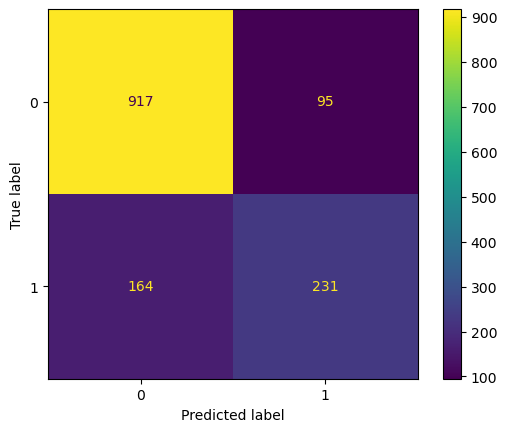

In [233]:
metrics.ConfusionMatrixDisplay(metrics.confusion_matrix(y_test, X_test['y_pred'])).plot()
plt.show()

In [234]:
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [235]:
## Now, we simply apply the function on our predictions
get_results(y_test, X_test['y_pred'])

The confusion matrix for your predictions is:
[[917  95]
 [164 231]] 

The accuracy of your model is: 0.8159203980099502
The recall of your model is: 0.5848101265822785
The precision of your model is: 0.7085889570552147
The F1-score of your model is: 0.6407766990291263


In [236]:
get_results(y_train, X_train['y_pred'])

The confusion matrix for your predictions is:
[[3732  419]
 [ 633  841]] 

The accuracy of your model is: 0.8129777777777778
The recall of your model is: 0.5705563093622795
The precision of your model is: 0.6674603174603174
The F1-score of your model is: 0.6152158010241404


## Logreg! (Statsmodels)

In [242]:
log_reg = sm.Logit(y_train, X_train).fit()

Optimization terminated successfully.
         Current function value: 0.398789
         Iterations 8


In [243]:
print(log_reg.summary())

                           Logit Regression Results                           
Dep. Variable:            Churn Value   No. Observations:                 5625
Model:                          Logit   Df Residuals:                     5599
Method:                           MLE   Df Model:                           25
Date:                Mon, 21 Jul 2025   Pseudo R-squ.:                  0.3067
Time:                        15:30:18   Log-Likelihood:                -2243.2
converged:                       True   LL-Null:                       -3235.4
Covariance Type:            nonrobust   LLR p-value:                     0.000
                                             coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------------------------------
const                                      0.2213      0.417      0.530      0.596      -0.597       1.039
Latitude                                  -0.12

In [244]:
def get_results(actual, predicted):
    print("The confusion matrix for your predictions is:")
    print(metrics.confusion_matrix(actual, predicted), "\n")
    print(f'The accuracy of your model is: {metrics.accuracy_score(actual, predicted)}')
    print(f'The recall of your model is: {metrics.recall_score(actual, predicted)}')
    print(f'The precision of your model is: {metrics.precision_score(actual, predicted)}')
    print(f'The F1-score of your model is: {metrics.f1_score(actual, predicted)}')

In [251]:
y_test_pred = log_reg.predict(X_test)

In [254]:
test_prediction = list(map(round,y_test_pred))

In [259]:
get_results(y_test,test_prediction)

The confusion matrix for your predictions is:
[[915  97]
 [166 229]] 

The accuracy of your model is: 0.8130774697938877
The recall of your model is: 0.579746835443038
The precision of your model is: 0.7024539877300614
The F1-score of your model is: 0.6352288488210819


In [256]:
y_train_pred = log_reg.predict(X_train)

In [257]:
train_prediction = list(map(round,y_train_pred))

In [260]:
get_results(y_train,train_prediction)

The confusion matrix for your predictions is:
[[3727  424]
 [ 628  846]] 

The accuracy of your model is: 0.8129777777777778
The recall of your model is: 0.5739484396200815
The precision of your model is: 0.6661417322834645
The F1-score of your model is: 0.6166180758017493
